In [1]:
#Code is from 'MNIST For ML Beginners' by the Tensorflow Authors

# Import modules necessary for MNIST Experiment
import tensorflow as tf

In [2]:
#Setup MNIST data (This command may be rather slow)

#Import example
from tensorflow.examples.tutorials.mnist import input_data
#Setup data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
#Setup graph for neural network (Very simple grpah in this case)

# Create the model
x = tf.placeholder(tf.float32, [None, 784]) #Input values (N images by 784 pixels per image)
W = tf.Variable(tf.zeros([784, 10]))        #Weight values for input (784 pixels by 10 possible digits)
b = tf.Variable(tf.zeros([10]))             #Bias values for each digit
y = tf.nn.softmax(tf.matmul(x, W) + b)      #Output vector, Softmax(Wx + b)

In [4]:
#Use the graph and cross entropy to create a training setp

# Define loss placeholder
y_ = tf.placeholder(tf.float32, [None, 10]) #How far is result from actual
# Create cross_entropy function based on loss and actual
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# Instruct TensorFlow to attempt to minimize the cross_entropy using the Gradient Descent 
# Optimizer with a learning value of 0.5
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [5]:
#Initialize variables and run the session.

# Initialize and save variables
init = tf.global_variables_initializer()
sess = tf.Session()     #Start new Session
sess.run(init)          #Initialize variables

#Number of steps to run
num_steps = 1000

# Run training steps Num Steps times
for n in range(num_steps):
    #Get a batch of 100 images
    #Batch_x are the input images as a flattened 784 pixel vector
    #Batch_y is a vector of what number the image represents
    batch_x, batch_y = mnist.train.next_batch(100)
    
    #Run the session with the given data (Do one training step)
    sess.run(train_step, feed_dict={x: batch_x, y_: batch_y})

In [6]:
#Evaluate the model

# Define way to check session and run the function with test data
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))    #Define function to calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))  #Define function to display result
print("Accuray of prediction is " + 
      str(int(10000 * sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))/100) + "%");

Accuray of prediction is 92.0%


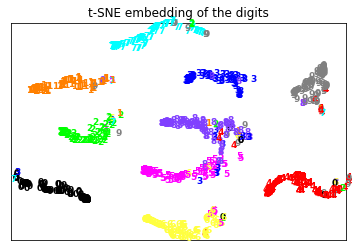

In [7]:
#Use matplotlib to generate a grpahical model for the neural network

# Design of this section primarily from Saurabh Jaju 
# https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/

# importing the required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

# Define colors for plotting numbers
colors = [(0,0,0,1),        #Black for zero
            (1, .5,0, 1),   #Orange for one
            (0, 1, 0, 1),   #Green for two
            (0, 0, 1, 1),   #Blue for three
            (1, 0, 0, 1),   #Red for four
            (1, 0, 1, 1),   #Magenta for five
            (1, 1, .25, 1), #Yellow for six
            (0, 1, 1, 1),   #Teal for seven
            (.5, .25, 1, 1),#Purple for eight
            (.5, .5, .5, 1)#Grey for nine
         ]

# Load n_samples samples from training data
n_samples = 1000
#Batch_x are the input images as a flattened 784 pixel vector
#Batch_y is a vector of what number the image represents
batch_x, batch_y = mnist.train.next_batch(n_samples)
X = sess.run(y, feed_dict={x:batch_x})

## Function to Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    #Calculate min and max of graphs
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    #Normalize values based on input
    X = (X - x_min) / (x_max - x_min)     
    plt.figure()
    ax = plt.subplot(111)
    for i in range(n_samples):
        num = np.argmax(batch_y[i])
        plt.text(X[i, 0], X[i, 1], str(num),
                 color=colors[num],
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
        
# Computing t-SNE projection
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
tsne_vector = tsne.fit_transform(X)
plot_embedding(tsne_vector, "t-SNE embedding of the digits")

#Display resulting graph
plt.show()